# 모델 로딩 
* 기존에 생성한 모델을 재사용하기 위해서 로딩한다. 

# verbose
* model.fit과 predict 에서 사용하는 파라미터 

# Earlystopping
* 어느 정도 결과값이 나오게 되면 멈추게 하는 기능 
* model.fit에서 사용 

## 1. 데이터

In [1]:
import numpy as np

In [2]:
x_train = np.array([[1,2,3,4,5], [2,3,4,5,6], [3,4,5,6,7]])
y_train = np.array([6,7,8])
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print("x_train.shape : ", x_train.shape) 
print("y_train.shape : ", y_train.shape) 

x_train.shape :  (3, 5, 1)
y_train.shape :  (3,)


## 2. 모델 구성

In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense

* 기존에 존재하는 모델을 로딩해서 사용한다. 
* 새로운 이름 추가시 유일한 이름을 사용해야 한다.

In [12]:
model = load_model("savetest01.h5")
model.add(Dense(1, name='dense_2'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7)                 252       
_________________________________________________________________
dense (Dense)                (None, 4)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


## 3. 훈련
* loss : 사용할 loss 함수 
* metrics : 사용할 측정 방식 
    - mes : mean squared error
    - accuracy : 정확도
    - mae : mean absolute error 
* verbose : 훈련하는 과정을 보일것이지 결정 
    - 0 : 보이지 않음
    - 1 : 과정을 보여줌 
    - 2 : 과정을 간단히 보여줌 

In [13]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

#### EarlyStopping 은 실무에서 많이 사용
* monitor는 loss 사용 
* patience=10 : 성능이 증가하지 않는 epoch이 10회이상 반복되면 중지 
* mode='min' : monitor의 loss 값이 min값, 즉 최솟값일 때 적용

In [15]:
tb_hist = TensorBoard(log_dir='./graph', histogram_freq=0,write_graph=True, write_images=True)

In [16]:
early_stopping = EarlyStopping(monitor='loss', patience=10, mode='min')

In [17]:
hist = model.fit(x_train, y_train, epochs=1000, batch_size=1, verbose=2, callbacks=[early_stopping, tb_hist])

Train on 3 samples
Epoch 1/1000
3/3 - 1s - loss: 50.8894 - mse: 50.8894
Epoch 2/1000
3/3 - 0s - loss: 50.5882 - mse: 50.5882
Epoch 3/1000
3/3 - 0s - loss: 50.3150 - mse: 50.3150
Epoch 4/1000
3/3 - 0s - loss: 50.0140 - mse: 50.0140
Epoch 5/1000
3/3 - 0s - loss: 49.7459 - mse: 49.7459
Epoch 6/1000
3/3 - 0s - loss: 49.4807 - mse: 49.4807
Epoch 7/1000
3/3 - 0s - loss: 49.2330 - mse: 49.2330
Epoch 8/1000
3/3 - 0s - loss: 48.9497 - mse: 48.9496
Epoch 9/1000
3/3 - 0s - loss: 48.6853 - mse: 48.6853
Epoch 10/1000
3/3 - 0s - loss: 48.4106 - mse: 48.4106
Epoch 11/1000
3/3 - 0s - loss: 48.1515 - mse: 48.1515
Epoch 12/1000
3/3 - 0s - loss: 47.8365 - mse: 47.8365
Epoch 13/1000
3/3 - 0s - loss: 47.5284 - mse: 47.5284
Epoch 14/1000
3/3 - 0s - loss: 47.1426 - mse: 47.1426
Epoch 15/1000
3/3 - 0s - loss: 46.8198 - mse: 46.8198
Epoch 16/1000
3/3 - 0s - loss: 46.4280 - mse: 46.4280
Epoch 17/1000
3/3 - 0s - loss: 45.9756 - mse: 45.9756
Epoch 18/1000
3/3 - 0s - loss: 45.5739 - mse: 45.5739
Epoch 19/1000
3/3 

## 4. 학습과정확인

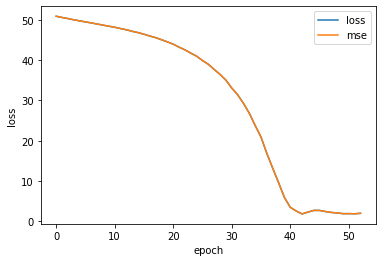

In [18]:
import matplotlib.pyplot as plt
# print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
# #plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show()

## 5. 평가 및 예측
* 예측값 데이터로 사용하기 위해 모양을 맞춰줘야 한다.

In [19]:
x_predict = np.array([[4,5,6,7,8]])
print(x_predict.shape) #(1, 5)
x_predict = x_predict.reshape(x_predict.shape[0], x_predict.shape[1], 1)
print(x_predict.shape)

(1, 5)
(1, 5, 1)


In [20]:
y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

예측값 :  [[11.555204]]
